In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

import pandas as pd

import numpy as np

# SET PLOTTING SETTINGS
SMALL_SIZE = 20
MEDIUM_SIZE = 24
BIGGER_SIZE = 28

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title

# Load Experimental doubling time

In [30]:
df_doubling = pd.read_excel('../Data/Experimental/doubling time.xlsx', index_col=3, header=3).dropna(axis='index',how='all').dropna(axis='columns', how='all')
df_doubling = df_doubling.iloc[:12,[2]]
df_doubling = df_doubling.rename({'Unnamed: 7':'Doubling time'},axis=1)
df_doubling

,Doubling time
PLC M1,19.002375
PLC M2,20.024691
PLC M3,21.102151
PLC M4,24.191617
PLC M5,42.275132
PLC M6,64.420567
Huh7 M1,16.858238
Huh7 M2,16.470588
Huh7 M3,18.106996
Huh7 M4,18.518519


# Load Lactate data

In [39]:
# read excel file and remove NaNs
# set index to the cell line + medium identifier as in the publication
df_hplc_lac_pyr = pd.read_excel('../Data/Experimental/hplc.xlsx', sheet_name='lactate', index_col=0, header=7, usecols=list(range(11,21))).dropna(axis='index',how='all').dropna(axis='columns', how='all')

# fix column typos
df_hplc_lac_pyr = df_hplc_lac_pyr.rename({'Time.1':'Time',
                                        'Avarage value .2':'Concentration [mM]',
                                         'Avarage value .3':'Concentration [mM]',
                                         'Standart error.2':'SD',
                                         'Standart error.3':'SD'},axis=1)

# fix index column
df_hplc_lac_pyr.index = df_hplc_lac_pyr.index.str.replace('HUHC3M([0-9]{1})[0-9]+$',r'Huh7 M\1', regex=True)
df_hplc_lac_pyr.index = df_hplc_lac_pyr.index.str.replace('PLCC3M([0-9]{1})[0-9]+$',r'PLC M\1', regex=True)

# Correctly relabel M6 as M3, M5 as M4, M3 as M5 and M4 as M6
df_hplc_lac_pyr.index = df_hplc_lac_pyr.index.str.replace("M3","MX").str.replace("M4","MY")
df_hplc_lac_pyr.index = df_hplc_lac_pyr.index.str.replace("M6","M3").str.replace("M5","M4")
df_hplc_lac_pyr.index = df_hplc_lac_pyr.index.str.replace("MX","M5").str.replace("MY","M6")

# Replace medium indication 'M' with Nutrient Availability "NA"
df_hplc_lac_pyr.index = df_hplc_lac_pyr.index.str.replace("M", "NA")

display(df_hplc_lac_pyr.head())
print()

# identify the lacate, pyruvate, huh7 and plc subsets of the data
# make sure to use publication order
df_hplc_lac_huh = df_hplc_lac_pyr.filter(axis='index',like='Huh7').iloc[:,[0,1,2]]
df_hplc_pyr_huh = df_hplc_lac_pyr.filter(axis='index',like='Huh7').iloc[:,[1,3,4]]
df_hplc_lac_plc = df_hplc_lac_pyr.filter(axis='index',like='PLC').iloc[:,[0,1,2]]
df_hplc_pyr_plc = df_hplc_lac_pyr.filter(axis='index',like='PLC').iloc[:,[1,3,4]]
df_hplc_ratio_huh = df_hplc_lac_pyr.filter(axis='index',like='Huh7').iloc[:,[1,5]]
df_hplc_ratio_plc = df_hplc_lac_pyr.filter(axis='index',like='PLC').iloc[:,[1,5]]

# Fix missing PLC M1 t = 0 value
df_hplc_pyr_plc.fillna(0, inplace=True)

# test
df_hplc_ratio_plc.head()

,Concentration [mM],Time,SD,Concentration [mM],SD,lacate/pyruvate
Huh7 NA1,0.000,0.0,0.03200,0.000,0.00000,NaN
Huh7 NA1,3.505,14.0,0.20725,0.499,0.02495,7.024048
Huh7 NA1,4.968,30.0,0.28040,0.574,0.02870,8.655052
Huh7 NA1,7.887,46.0,0.42635,0.828,0.04140,9.525362
Huh7 NA1,11.121,62.0,0.58805,1.045,0.05225,10.642105


,Time,lacate/pyruvate
PLC NA1,NaN,NaN
PLC NA1,9.5,10.488189
PLC NA1,24.0,21.224599
PLC NA1,40.0,20.945455
PLC NA1,57.0,29.085185


# Load the glucose data

In [38]:
# read excel file and remove NaNs
# set index to the cell line + medium identifier as in the publication
df_hplc_glc = pd.read_excel('../Data/Experimental/hplc.xlsx', sheet_name='Glucose_', index_col=0, header=12, usecols=list(range(2,6))).dropna(axis='index',how='all').dropna(axis='columns', how='all')

# fix column typos
df_hplc_glc = df_hplc_glc.rename({'Time.1':'Time',
                                        'Avarage from 3 measurements':'Concentration [mM]',
                                         'Standart error':'SD',},axis=1)

# fix index column
df_hplc_glc.index = df_hplc_glc.index.str.replace('HUHC3M([0-9]{1})[0-9]+$',r'Huh7 M\1', regex=True)
df_hplc_glc.index = df_hplc_glc.index.str.replace('PLCC3M([0-9]{1})[0-9]+$',r'PLC M\1', regex=True)

# Correctly relabel M6 as M3 and M5 as M4
df_hplc_glc.index = df_hplc_glc.index.str.replace("M3","MX").str.replace("M4","MY")
df_hplc_glc.index = df_hplc_glc.index.str.replace("M6","M3").str.replace("M5","M4")
df_hplc_glc.index = df_hplc_glc.index.str.replace("MX","M5").str.replace("MY","M6")

# Replace medium indication 'M' with Nutrient Availability "NA"
df_hplc_glc.index = df_hplc_glc.index.str.replace("M", "NA")

# Huh7 glucose data contains ----- in M5 and M6 because there was no glucose
df_hplc_glc.replace('-----',0, inplace=True)

# Also fill NaN with zeros
df_hplc_glc.fillna(0,inplace=True)

display(df_hplc_glc.head())
print()

df_hplc_glc_huh = df_hplc_glc.filter(axis='index',like='Huh7')
df_hplc_glc_plc = df_hplc_glc.filter(axis='index',like='PLC')

df_hplc_glc_huh.head()

,Concentration [mM],SD,Time
Huh7 NA1,25.334,2.533400,0.0
Huh7 NA1,19.611,1.484319,14.0
Huh7 NA1,16.591,1.029141,30.0
Huh7 NA1,13.726,1.770000,46.0
Huh7 NA1,8.981,0.906736,62.0


,Concentration [mM],SD,Time
Huh7 NA1,25.334,2.533400,0.0
Huh7 NA1,19.611,1.484319,14.0
Huh7 NA1,16.591,1.029141,30.0
Huh7 NA1,13.726,1.770000,46.0
Huh7 NA1,8.981,0.906736,62.0


# Produce Doubling time plot

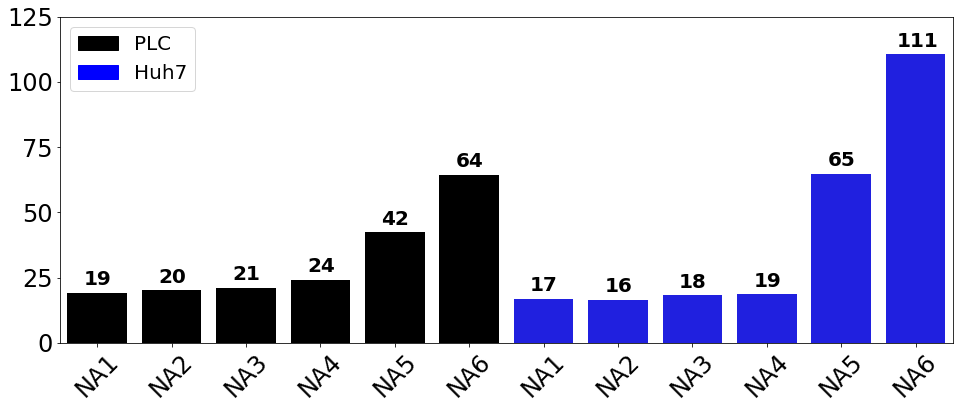

In [29]:
fig = plt.figure(figsize=[16, 6])
ax = fig.gca()
doubling_barplot = sns.barplot(data=df_doubling.transpose(),palette=['k']*6+['b']*6)
plt.setp(doubling_barplot.get_xticklabels(), rotation=45)
ax.set_xticklabels(['NA1','NA2','NA3','NA4','NA5','NA6']*2)
ax.set_ylim([0, 125])

for i, v in enumerate(df_doubling['Doubling time']):
    if v >= 100:
        x_offset = 0.26
    else:
        x_offset = 0.18
    ax.text(i-x_offset, v + 3, str(round(v)), color='k', fontweight='bold', fontsize=20)
    
black_patch = mpatches.Patch(color='black', label='PLC')
blue_patch = mpatches.Patch(color='blue', label='Huh7')
_ = plt.legend(handles=[black_patch, blue_patch])
#ax.text(-0.07, 1.04, 'C', transform=ax.transAxes, size=30, weight='bold')

fig.savefig('../Figures/Fig_3_doubling_time.pdf', bbox_inches = 'tight', pad_inches=0.1)
plt.show()

# Produce the plot

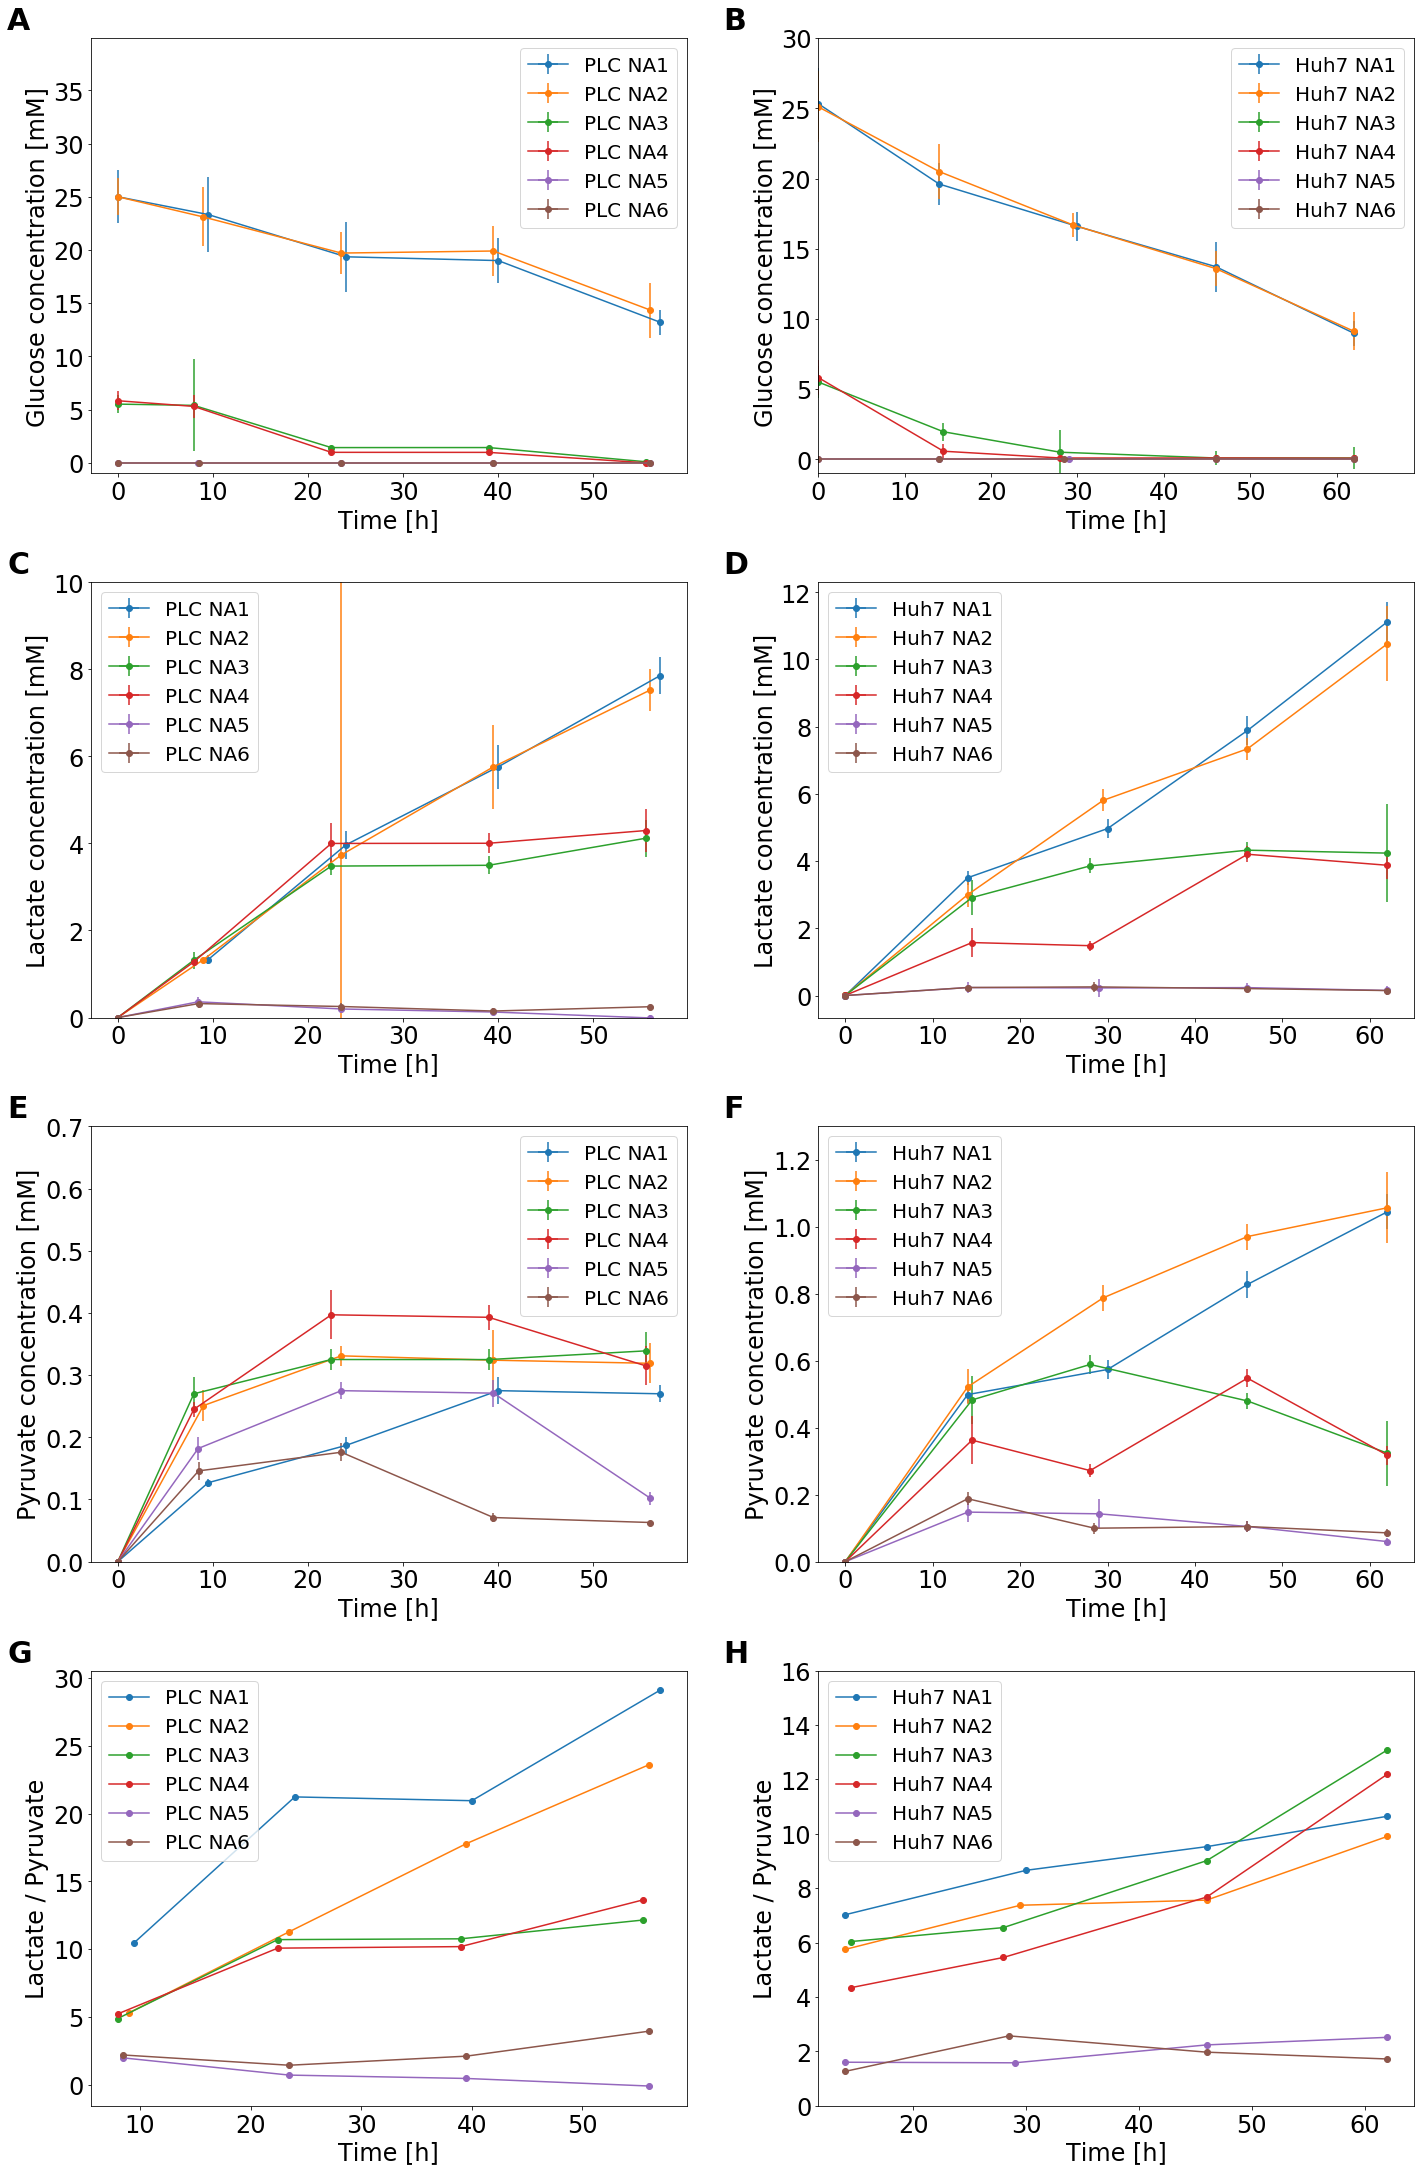

In [40]:
fig, axs = plt.subplots(nrows=4, ncols=2)
fig.set_size_inches(20,30)
fig.tight_layout()
plt.subplots_adjust(hspace=0.25, wspace=0.22)


# PLC Glucose
for exp in np.unique(df_hplc_glc_plc.index):
    df = df_hplc_glc_plc.loc[exp]
    axs[0, 0].errorbar(df['Time'], df['Concentration [mM]'], xerr=0, yerr=df['SD'], marker='o', label=exp)
axs[0,0].set_ylim([-1,39.9])
axs[0,0].set_xlabel('Time [h]')
axs[0,0].set_ylabel('Glucose concentration [mM]')
axs[0, 0].legend()
axs[0,0].text(-0.14, 1.02, 'A', transform=axs[0,0].transAxes, size=30, weight='bold')

# Huh7 Glucose
for exp in np.unique(df_hplc_glc_huh.index):
    df = df_hplc_glc_huh.loc[exp]
    axs[0, 1].errorbar(df['Time'], df['Concentration [mM]'], xerr=0, yerr=df['SD'], marker='o', label=exp)
axs[0,1].set_ylim([-1,30])
axs[0,1].set_xlim([0,69])
axs[0,1].set_xlabel('Time [h]')
axs[0,1].set_ylabel('Glucose concentration [mM]')
axs[0, 1].legend()
axs[0,1].text(-0.16, 1.02, 'B', transform=axs[0,1].transAxes, size=30, weight='bold')

# PLC Lactate
for exp in np.unique(df_hplc_lac_plc.index):
    df = df_hplc_lac_plc.loc[exp]
    axs[1, 0].errorbar(df['Time'], df['Concentration [mM]'], xerr=0, yerr=df['SD'], marker='o', label=exp)
axs[1,0].set_ylim([0,10])
axs[1,0].set_xlabel('Time [h]')
axs[1,0].set_ylabel('Lactate concentration [mM]')
axs[1, 0].legend()
axs[1,0].text(-0.14, 1.02, 'C', transform=axs[1,0].transAxes, size=30, weight='bold')

# Huh7 Lactate
for exp in np.unique(df_hplc_lac_huh.index):
    df = df_hplc_lac_huh.loc[exp]
    axs[1, 1].errorbar(df['Time'], df['Concentration [mM]'], xerr=0, yerr=df['SD'], marker='o', label=exp)
axs[1,1].set_xlabel('Time [h]')
axs[1,1].set_ylabel('Lactate concentration [mM]')
axs[1, 1].legend()
axs[1,1].text(-0.16, 1.02, 'D', transform=axs[1,1].transAxes, size=30, weight='bold')

# PLC Pyruvate
for exp in np.unique(df_hplc_pyr_plc.index):
    df = df_hplc_pyr_plc.loc[exp]
    axs[2, 0].errorbar(df['Time'], df['Concentration [mM]'], xerr=0, yerr=df['SD'], marker='o', label=exp)
axs[2,0].set_ylim([0,0.7])
axs[2,0].set_xlabel('Time [h]')
axs[2,0].set_ylabel('Pyruvate concentration [mM]')
axs[2, 0].legend()
axs[2,0].text(-0.14, 1.02, 'E', transform=axs[2,0].transAxes, size=30, weight='bold')

# Huh7 Pyruvate
for exp in np.unique(df_hplc_pyr_huh.index):
    df = df_hplc_pyr_huh.loc[exp]
    axs[2, 1].errorbar(df['Time'], df['Concentration [mM]'], xerr=0, yerr=df['SD'], marker='o', label=exp)
axs[2,1].set_ylim([0,1.3])
axs[2,1].set_xlabel('Time [h]')
axs[2,1].set_ylabel('Pyruvate concentration [mM]')
axs[2, 1].legend()
axs[2,1].text(-0.16, 1.02, 'F', transform=axs[2,1].transAxes, size=30, weight='bold')

# PLC Lactate/Pyruvate ratio
for exp in np.unique(df_hplc_ratio_plc.index):
    df = df_hplc_ratio_plc.loc[exp]
    axs[3, 0].plot(df['Time'], df['lacate/pyruvate'], 'o-', label=exp)
axs[3,0].set_xlabel('Time [h]')
axs[3,0].set_ylabel('Lactate / Pyruvate')
axs[3, 0].legend()
axs[3,0].text(-0.14, 1.02, 'G', transform=axs[3,0].transAxes, size=30, weight='bold')

# Huh7 Lactate/Pyruvate ratio
for exp in np.unique(df_hplc_ratio_huh.index):
    df = df_hplc_ratio_huh.loc[exp]
    axs[3, 1].plot(df['Time'], df['lacate/pyruvate'], 'o-', label=exp)
axs[3,1].set_ylim([0,16])
axs[3,1].set_xlabel('Time [h]')
axs[3,1].set_ylabel('Lactate / Pyruvate')
axs[3, 1].legend()
axs[3,1].text(-0.16, 1.02, 'H', transform=axs[3,1].transAxes, size=30, weight='bold')

fig.savefig('../Figures/Fig_6_HPLC.pdf', bbox_inches = 'tight', pad_inches=0.1)
plt.show()